# Incomplete Markets. Partial Equilibrium

# Under Certainty

Number of iterations: 62
TOC: Elapsed: 0:00:35.86
Algorithm takes 35.869 seconds to run


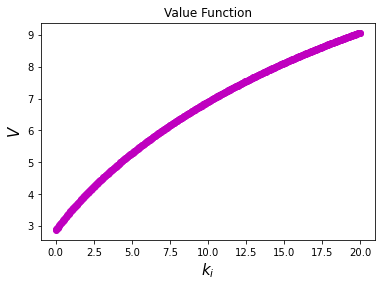

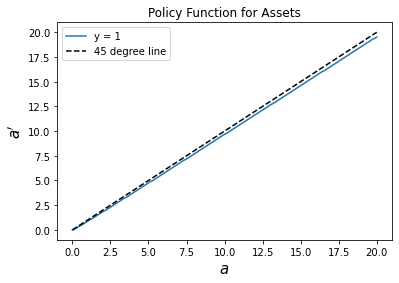

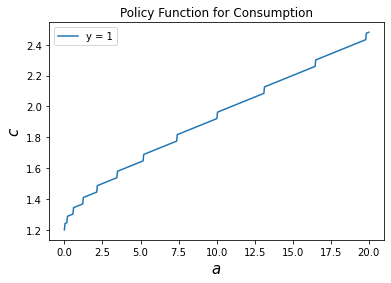

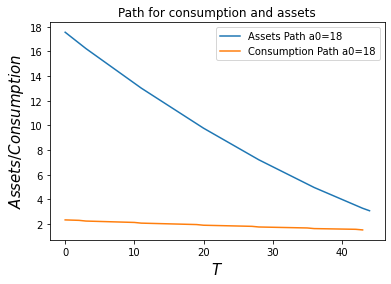

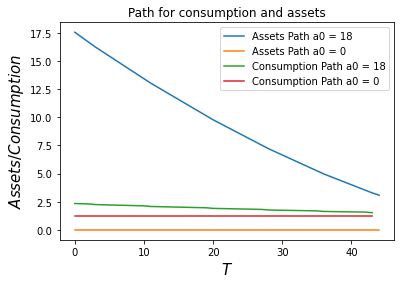

In [1]:
# Now we can solve the problem. I will follow the STEPS in the slides: QM-Value_Functions_Metods.pdf

# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

# Define the parameters: 

rho=0.06
r=0.04
sigma=2
c_bar=100
gamma=0
sigma_y=0.5
y=1.2
beta=1/(1+rho)
Y1 = [y-sigma_y, y+sigma_y]
PI1 = [[(1+gamma)/2, (1-gamma)/2], [(1-gamma)/2, (1+gamma)/2]]
Amin = 0
n=500
grid=500
epsilon=0.05
Certainty=True
Amax=20
omega = -111111111111111

grid = np.linspace(Amin,Amax,n)   # Discrete grid of k

# STEP 2. I make the guess V^{s=0}(k_i)=0.

V = np.zeros(shape=(1,n))    # Initial Guess


# STEP 3 & 4. Generate the return matrix M. Not all values of c are feasible. 

# Generate a function that will evaluate the current utility, that is u(f(k_i)+(1-delta)k_i-k_j): 

def utility (a0,a1):
    "This function returs the utility given k_i and k_j with the form u() = ln(k1^{1-θ} + (1-δ)k1-k2)"
    # Inputs:
        #--> Capital today:    k1
        #--> Capital tomorrow: k2
        
    c = y+a0*(1+r)-a1
    if c>=0:    
        u = (((c)**(1-sigma)-1)/(1-sigma))
    else:
        u=omega
    return u

# As suggested by the slides I will change not feasible values by a very negative number omega:



# Define a function that gives the maximum k_j feasible given k_i
def feasible(a0):
    "Returns the maximum feasible k_j given k_i with the form : f(k_i)+(1-δ)k_i"
    # Inputs:
        #--> Capital today:    k1
    f = y+(1+r)*a0
    return f

# Generate the matrix M following the lecture notes : 

M = np.zeros(shape=(n,n))     # Empty matrix that later will become the utility evaluated at every possible combination of k_i and k_j

for i in range(n):
    for j in range(n):
            M[i][j] = utility(grid[i],grid[j])    # Gives the element ij of matrix M

# Important !! --> I have to do Step 3 and 4 at the same time since the log of a negative value is not well defined, so I have to prevent this. 


# STEP 5 & 6. Compute the matrix X. Solve for V^{s+1} and check for tolerance.

epsilon = 0.005    # Tolerance level.

def VFI(M,V,epsilon):
    "This function returns the solution for the Bellman equation using Value Function Iteration algorithim and counts the number of iterations "
    # Inputs:
        # --> M (Initial value)
        # --> V (Initial guess)
        # --> epsilon (tolerance)    
    # Output:
        # --> Returns fixed point value function.
    
    qe.tic()                       # Starts to count the time this functions takes to run
    
    X  = np.zeros(shape=(n,n))     # Empty Array that will hold all possible Bellman equations
    
    Vnew = np.zeros(shape=(1,n))   # Array for new iteriation of V. 
    
    g = np.zeros(shape=(1,n))      # Array for optimal decision rule
    
    # Loop to generate X:
    for i in range(n):
        for j in range(n):
            X[i][j] = M[i][j] + beta*V[0][j]
    
    # Get the max of all the possible X[i] given j:

    for i in range(n):
        Vnew[0][i] = np.amax(X[i][:])     # New iteration for V
        g[0][i] = np.argmax(X[i][:])        # The optimal decision rule
    
    # Generate the new value function and repeat the process until tolerance is satisfied:
    
    count=0                                 # Will count the number of iterations
    while np.any(abs(V-Vnew)>= epsilon):    # Generate a loop as long as tolerance is not satisfied
        V = Vnew.copy()
        for i in range(n):
            for j in range(n):         
                X[i][j] = M[i][j] + beta*Vnew[0][j]
    
        for i in range(n):    
            Vnew[0][i] = np.amax(X[i][:])
            g[0][i] = np.argmax(X[i][:])
        count +=1
 
    print('Number of iterations: '+str(count)) 
    
    T = qe.toc()     # Stops counting time
    
    print('Algorithm takes '+ str(round(T,3)) + ' seconds to run')
    return V , g
    
ValueFunction1 , Policy_CRRA_1 = VFI(M,V,epsilon)


# Plot Value Function:

fig, ax = plt.subplots()
ax.plot(grid,ValueFunction1.T,'m-o')
plt.ylabel("$V$",fontsize=15)
plt.xlabel("$k_i$",fontsize=15)
plt.title("Value Function")

p_CRRA_1 = np.zeros(n)
for i in range(n):
    j = np.int(Policy_CRRA_1[0][i])
    p_CRRA_1[i] = grid[j]

fig, ax = plt.subplots()
ax.plot(grid,p_CRRA_1,label='y = 1')
ax.plot(grid,grid,'k--',label='45 degree line')
plt.ylabel("$a'$",fontsize=15)
plt.xlabel("$a$",fontsize=15)
plt.title("Policy Function for Assets")
plt.legend()
            
def consumption(g, y):
        Consum = np.zeros(len(g))
        for i in range(len(g)):
            Consum[i]=(y+(1+r)*grid[i]-grid[np.int(g[i])])
        return Consum

c_CRRA_1 = consumption(Policy_CRRA_1.T,y)


fig, ax = plt.subplots()
ax.plot(grid,c_CRRA_1,label='y = 1')
plt.ylabel("$c$",fontsize=15)
plt.xlabel("$a$",fontsize=15)
plt.title("Policy Function for Consumption")
plt.legend() 

# Subrutine for Consumption and Assets Path:
    
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

    
def assets_path(grid,policy,initial_assets,T,y):
    
    g = find_nearest(grid,initial_assets)
    
    c = np.where(grid == g)
    
    aspath = np.zeros(T)
    
    conspath = np.zeros(T-1)
    
    for i in range(T):
        
        aspath[i] = grid[np.int(policy[0][c])]
        
        c = np.where(grid == aspath[i])
        
    for i in range(T-1):
        
        conspath[i] = y+aspath[i]*(1+r)-aspath[i+1]
        
    return aspath,conspath
        
        
assetspath_1_CRRA_1, conspath_1_CRRA_1 = assets_path(grid,Policy_CRRA_1,18,45,y)        
    
    
fig, ax = plt.subplots()
ax.plot(range(45),assetspath_1_CRRA_1,label='Assets Path a0=18')
ax.plot(range(44),conspath_1_CRRA_1,label='Consumption Path a0=18')
plt.ylabel("$Assets/Consumption$",fontsize=15)
plt.xlabel("$T$",fontsize=15)
plt.title("Path for consumption and assets")
plt.legend() 

assetspath2_CRRA_1, conspath2_CRRA_1 = assets_path(grid,Policy_CRRA_1,0,45,y)         
    
fig, ax = plt.subplots()
ax.plot(range(45),assetspath_1_CRRA_1,label='Assets Path a0 = 18')
ax.plot(range(45),assetspath2_CRRA_1,label='Assets Path a0 = 0')
ax.plot(range(44),conspath_1_CRRA_1,label='Consumption Path a0 = 18')
ax.plot(range(44),conspath2_CRRA_1,label='Consumption Path a0 = 0')
plt.ylabel("$Assets/Consumption$",fontsize=15)
plt.xlabel("$T$",fontsize=15)
plt.title("Path for consumption and assets")
plt.legend() 

assetspath_CE = assetspath2_CRRA_1
conspath_CE = conspath2_CRRA_1 

## Under Uncertainty

Number of iterations: 32000
TOC: Elapsed: 0:00:35.09
Algoritham takes 35.092 seconds to run


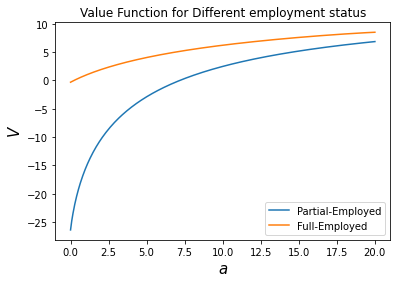

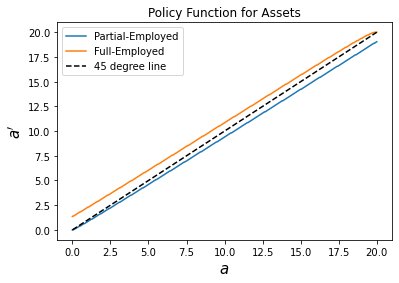

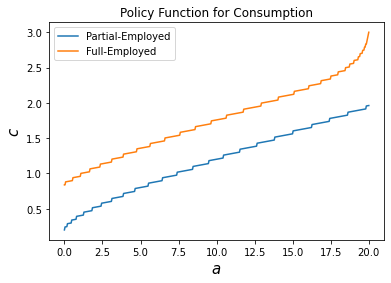

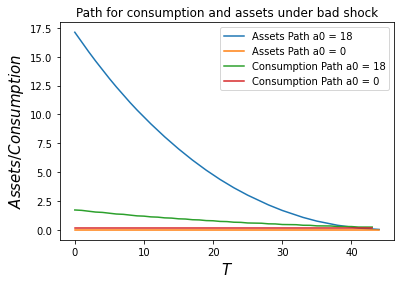

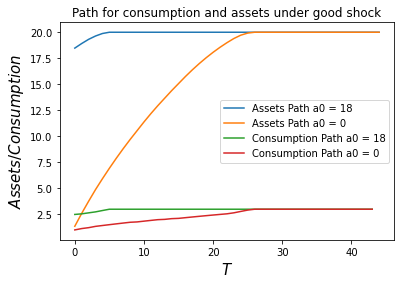

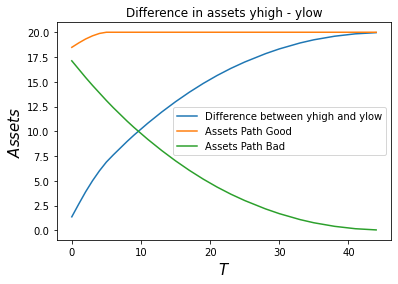

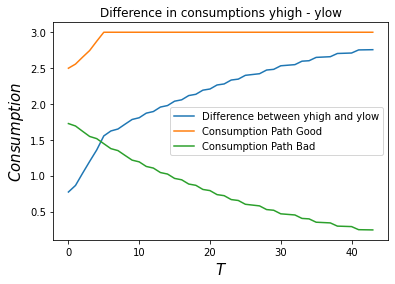

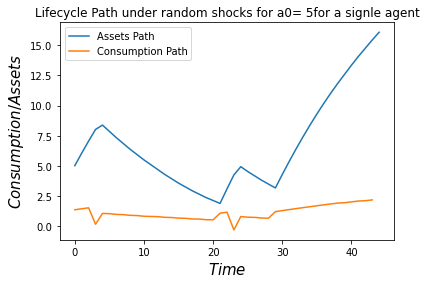

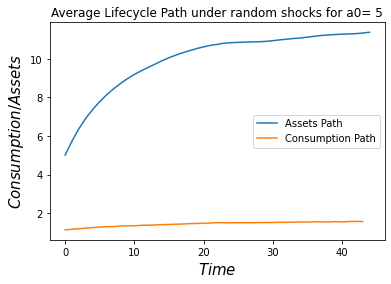

In [153]:
rho=0.06
r=0.04
sigma=2
c_bar=100
gamma=0.8
sigma_y=1
y=1.2
beta=1/(1+rho)
Y1 = [y-sigma_y, y+sigma_y]
PI1 = [[(1+gamma)/2, (1-gamma)/2], [(1-gamma)/2, (1+gamma)/2]]
Amin = 0
n=500
grid=500
epsilon=0.05
Certainty=True
Amax=20
omega = -111111111111111
initial_assets=5

grid = np.linspace(Amin,Amax,n)   # Discrete grid of k

# STEP 2. I make the guess V^{s=0}(k_i)=0.

V = np.zeros(shape=(1,n))    # Initial Guess

def utility (a0,a1,y):
    "This function returs the utility given k_i and k_j with the form u() = ln(k1^{1-θ} + (1-δ)k1-k2)"
    # Inputs:
        #--> Capital today:    k1
        #--> Capital tomorrow: k2
        
    c = y+a0*(1+r)-a1
    if c>=0:    
        u = (((c)**(1-sigma)-1)/(1-sigma))
    else:
        u=omega
    return u


def feasible(a0,y):
    "Returns the maximum feasible k_j given k_i with the form : f(k_i)+(1-δ)k_i"
    # Inputs:
        #--> Capital today:    k1
    f = y+(1+r)*a0
    return f


M = np.zeros(shape=(n*len(Y1),n))
            
for x in range(len(Y1)):
    for i in range(n):
        for j in range(n):
            if feasible(grid[i],Y1[x]) >= grid[j]: 
                M[i+n*x][j] = utility(grid[i],grid[j],Y1[x]) # Gives the element ij of matrix M
            else: 
                M[i+n*x][j] = omega
            

def VFI(M,V,epsilon):
    "This function returns the solution for the Bellman equation using Value Function Iteration algorithim and counts the number of iterations "
    # Inputs:
        # --> M (Initial value)
        # --> V (Initial guess)
        # --> epsilon (tolerance)    
    # Output:
        # --> Returns fixed point value function.
    
    qe.tic()                       # Starts to count the time this functions takes to run
    
    X = np.zeros(shape=(n*len(Y1),n))
            
    V= np.zeros(shape=(1,n*len(Y1)))
            
    Vnew = np.zeros(shape=(1,n*len(Y1)))
    
    g = np.zeros(shape=(1,n*len(Y1)))      # Array for optimal decision rule

            
    W = np.zeros(shape=(1,n*len(Y1)))
            
    # Get the max of all the possible X[j] = M + betaV given j, assuming the initial guess is V=0:
            
    for i in range(n*len(Y1)):
        Vnew[0][i] = np.amax(M[i][:])
        g[0][i] = np.argmax(X[i][:])        # The optimal decision rule
                
        # Generate the new value function and repeat the process until tolerance is satisfied:   
            
    count = 0
            
    while np.any(abs(V-Vnew)>=epsilon):
        V = Vnew.copy()
        for i in range(n*len(Y1)):
            if i<=n-1:
                Z = np.array([Vnew[0][i] , Vnew[0][i+n]])
                        
                W[0][i] = np.inner(PI1[0] , Z)
                        
            else: 
                Z = np.array([Vnew[0][i-n] , Vnew[0][i]])
                        
                W[0][i] = np.inner(PI1[1] , Z)     
         
        for x in range(len(Y1)):
            for i in range(n):
                for j in range(n):
                    X[i+n*x][j] = M[i+n*x][j] + beta*W[0][j+n*x]
                
        for i in range(n*len(Y1)):
            Vnew[0][i] = np.amax(X[i][:])
            g[0][i] = np.argmax(X[i][:])      
            count+=1
    print('Number of iterations: '+str(count))
            
    T = qe.toc()
            
    print('Algoritham takes '+ str(round(T,3)) + ' seconds to run')
            
    return V , g
    
ValueFunction1_CRRA_2 , Policy_CRRA_2 = VFI(M,V,epsilon)

ValueFunctBad_CRRA_2 = ValueFunction1_CRRA_2[0][0:n]
ValueFunctGood_CRRA_2 = ValueFunction1_CRRA_2[0][n:]

PolicyBad_CRRA_2= Policy_CRRA_2[0][0:n]
PolicyGood_CRRA_2 = Policy_CRRA_2[0][n:]

# Plot Value Function:

fig, ax = plt.subplots()
ax.plot(grid,ValueFunctBad_CRRA_2.T,label='Partial-Employed')
ax.plot(grid,ValueFunctGood_CRRA_2.T,label='Full-Employed')
plt.ylabel("$V$",fontsize=15)
plt.xlabel("$a$",fontsize=15)
plt.title("Value Function for Different employment status")
plt.legend()

pbad_CRRA_2 = np.zeros(n)
for i in range(n):
    j = np.int(PolicyBad_CRRA_2[i])
    pbad_CRRA_2[i] = grid[j]

pgood_CRRA_2 = np.zeros(n)
for i in range(n):
    j = np.int(PolicyGood_CRRA_2[i])
    pgood_CRRA_2[i] = grid[j]


fig, ax = plt.subplots()
ax.plot(grid,pbad_CRRA_2,label='Partial-Employed')
ax.plot(grid,pgood_CRRA_2,label='Full-Employed')
ax.plot(grid,grid,'k--',label='45 degree line')
plt.ylabel("$a'$",fontsize=15)
plt.xlabel("$a$",fontsize=15)
plt.title("Policy Function for Assets")
plt.legend()
            

cgood_CRRA_2 = consumption(PolicyGood_CRRA_2.T,Y1[1])
cbad_CRRA_2 = consumption(PolicyBad_CRRA_2.T,Y1[0])


fig, ax = plt.subplots()
ax.plot(grid,cbad_CRRA_2,label='Partial-Employed')
ax.plot(grid,cgood_CRRA_2,label='Full-Employed')
plt.ylabel("$c$",fontsize=15)
plt.xlabel("$a$",fontsize=15)
plt.title("Policy Function for Consumption")
plt.legend()  


# Subrutine for Consumption and Assets Path:
    
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

    
def assets_path(grid,policy,initial_assets,T,y):
    
    g = find_nearest(grid,initial_assets)
    
    c = np.where(grid == g)
    
    aspath = np.zeros(T)
    
    conspath = np.zeros(T-1)
    
    for i in range(T):
        
        aspath[i] = grid[np.int(policy[c])]
        
        c = np.where(grid == aspath[i])
        
    for i in range(T-1):
        
        conspath[i] = y+aspath[i]*(1+r)-aspath[i+1]
        
    return aspath,conspath
        
 
# For the Bad Shock:
    
assetspath_bad_CRRA_2, conspath_bad_CRRA_2 = assets_path(grid,PolicyBad_CRRA_2,18,45,Y1[0])        
assetspath2_bad_CRRA_2, conspath2_bad_CRRA_2 = assets_path(grid,PolicyBad_CRRA_2,0,45,Y1[0])         
    
fig, ax = plt.subplots()
ax.plot(range(45),assetspath_bad_CRRA_2,label='Assets Path a0 = 18')
ax.plot(range(45),assetspath2_bad_CRRA_2,label='Assets Path a0 = 0')
ax.plot(range(44),conspath_bad_CRRA_2,label='Consumption Path a0 = 18')
ax.plot(range(44),conspath2_bad_CRRA_2,label='Consumption Path a0 = 0')
plt.ylabel("$Assets/Consumption$",fontsize=15)
plt.xlabel("$T$",fontsize=15)
plt.title("Path for consumption and assets under bad shock")
plt.legend()  

# For the good shock: 
    
assetspath_good_CRRA_2, conspath_good_CRRA_2 = assets_path(grid,PolicyGood_CRRA_2,18,45,Y1[1])        
assetspath2_good_CRRA_2, conspath2_good_CRRA_2 = assets_path(grid,PolicyGood_CRRA_2,0,45,Y1[1])         
    
fig, ax = plt.subplots()
ax.plot(range(45),assetspath_good_CRRA_2,label='Assets Path a0 = 18')
ax.plot(range(45),assetspath2_good_CRRA_2,label='Assets Path a0 = 0')
ax.plot(range(44),conspath_good_CRRA_2,label='Consumption Path a0 = 18')
ax.plot(range(44),conspath2_good_CRRA_2,label='Consumption Path a0 = 0')
plt.ylabel("$Assets/Consumption$",fontsize=15)
plt.xlabel("$T$",fontsize=15)
plt.title("Path for consumption and assets under good shock")
plt.legend()    
    
# For a0 = 18, difference in assets: 

diffass_CRRA_2 = assetspath_good_CRRA_2 - assetspath_bad_CRRA_2    
    
fig, ax = plt.subplots()
ax.plot(range(45),diffass_CRRA_2,label='Difference between yhigh and ylow')
ax.plot(range(45),assetspath_good_CRRA_2,label='Assets Path Good')
ax.plot(range(45),assetspath_bad_CRRA_2,label='Assets Path Bad')
plt.ylabel("$Assets$",fontsize=15)
plt.xlabel("$T$",fontsize=15)
plt.title("Difference in assets yhigh - ylow")
plt.legend()    
  
# Show only consumption: 

diffcons_CRRA_2 =  conspath_good_CRRA_2 - conspath_bad_CRRA_2

fig, ax = plt.subplots()
ax.plot(range(44),diffcons_CRRA_2,label='Difference between yhigh and ylow')
ax.plot(range(44),conspath_good_CRRA_2,label='Consumption Path Good')
ax.plot(range(44),conspath_bad_CRRA_2,label='Consumption Path Bad')
plt.ylabel("$Consumption$",fontsize=15)
plt.xlabel("$T$",fontsize=15)
plt.title("Difference in consumptions yhigh - ylow")
plt.legend() 

# Random Income Lifecycle path:
def assets_path_random(grid,policy,initial_assets,T,Y,PI):
    
    ''' This function returns the optimal path for consumption an assets
    for an asset with concrete initial assets that faces an income shock in
    each of his lifecycle periods'''
    
    
    PolicyBad = policy[0][0:n]
    PolicyGood = policy[0][n:]
    
    g = find_nearest(grid,initial_assets)
    
    c = np.where(grid == g)
    
    aspath = np.zeros(T)
    
    conspath = np.zeros(T-1)
    
    a = np.random.binomial(1,8/10)
    
        
    for i in range(T):
        
        if i ==0:
            
            aspath[i] = g
            
            c = np.where(grid == g)
            
        if i>0:
        
            if a==1: 
        
                aspath[i] = grid[np.int(PolicyGood[c])]
            
                conspath[i-1] = Y1[1]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.binomial(1,PI[1][1])
                
                c = np.where(grid == aspath[i])
                
            if a==0:
                
                aspath[i] = grid[np.int(PolicyBad[c])]
            
                conspath[i-1] = Y1[0]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.binomial(1,PI[0][1])
                
                c = np.where(grid == aspath[i])
    
    
    return aspath, conspath

rand_ass,rand_cons =  assets_path_random(grid ,Policy_CRRA_2,initial_assets,45,Y1,PI1)

rand_ass1 = np.zeros(shape=(1000,45))
rand_cons1 = np.zeros(shape=(1000,44))
for i in range(1000):
    rand_ass_1, rand_cons_1 =  assets_path_random(grid ,Policy_CRRA_2,initial_assets,45,Y1,PI1)
    rand_ass1[i][:] = rand_ass_1
    rand_cons1[i][:] = rand_cons_1
    
av_ass = np.mean(rand_ass1,axis=0)
av_cons = np.mean(rand_cons1,axis=0)

fig, ax = plt.subplots()
ax.plot(range(45),rand_ass,label='Assets Path')
ax.plot(range(44),rand_cons,label='Consumption Path')
plt.ylabel("$Consumption/Assets$",fontsize=15)
plt.xlabel("$Time$",fontsize=15)
plt.title("Lifecycle Path under random shocks for a0= " + str(initial_assets) + "for a signle agent")
plt.legend() 

fig, ax = plt.subplots()
ax.plot(range(45),av_ass,label='Assets Path')
ax.plot(range(44),av_cons,label='Consumption Path')
plt.ylabel("$Consumption/Assets$",fontsize=15)
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Lifecycle Path under random shocks for a0= "+str(initial_assets))
plt.legend() 

## Suppose now I introduce an unexpected shock at period T= 20. 

The shock consists in increasing the probability of being partial employed. 

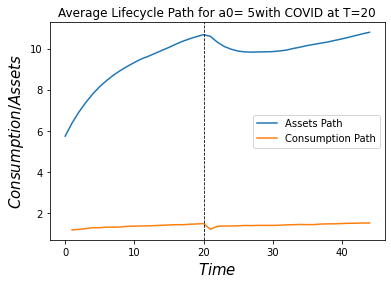

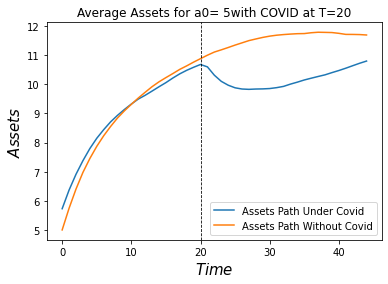

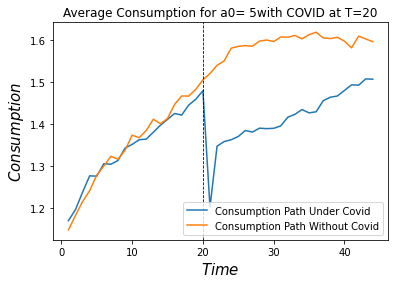

In [65]:
def assets_path_random_covid(grid,policy,initial_assets,T,Y,PI,shock_period,newprob):
    
    ''' This function returns the optimal path for consumption an assets
    for an asset with concrete initial assets that faces an income shock in
    each of his lifecycle periods'''
    
    
    PolicyBad = policy[0][0:n]
    PolicyGood = policy[0][n:]
    
    g = find_nearest(grid,initial_assets)
    
    c = np.where(grid == g)
    
    aspath = np.zeros(T)
    
    conspath = np.zeros(T-1)
    
    a = np.random.binomial(1,8/10)
    
        
    for i in range(T):
        
        if i ==0:
            
            aspath[i] = g
            
            c = np.where(grid == g)
        
        if i== shock_period+1:
            
            if a==1: 
        
                aspath[i] = grid[np.int(PolicyGood[c])]
            
                conspath[i-1] = Y1[1]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.binomial(1,newprob)
                
                c = np.where(grid == aspath[i])
                
            if a==0:
                
                aspath[i] = grid[np.int(PolicyBad[c])]
            
                conspath[i-1] = Y1[0]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.binomial(1,0)
                
                c = np.where(grid == aspath[i])
            
            
            
            
        else:
        
            if a==1: 
        
                aspath[i] = grid[np.int(PolicyGood[c])]
            
                conspath[i-1] = Y1[1]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.binomial(1,PI[1][1])
                
                c = np.where(grid == aspath[i])
                
            if a==0:
                
                aspath[i] = grid[np.int(PolicyBad[c])]
            
                conspath[i-1] = Y1[0]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.binomial(1,PI[0][1])
                
                c = np.where(grid == aspath[i])
    
    
    return aspath, conspath


rand_ass1_covid = np.zeros(shape=(1000,45))
rand_cons1_covid = np.zeros(shape=(1000,44))
for i in range(1000):
    rand_ass_1_covid, rand_cons_1_covid =  assets_path_random_covid(grid ,Policy_CRRA_2,initial_assets,45,Y1,PI1,20,0.5)
    rand_ass1_covid[i][:] = rand_ass_1_covid
    rand_cons1_covid[i][:] = rand_cons_1_covid
    
av_ass_covid = np.mean(rand_ass1_covid,axis=0)
av_cons_covid = np.mean(rand_cons1_covid,axis=0)


fig, ax = plt.subplots()
ax.plot(range(45),av_ass_covid,label='Assets Path')
ax.plot(range(1,45,1),av_cons_covid,label='Consumption Path')
plt.axvline(20 ,ls='--',lw=0.8,color='black')
plt.ylabel("$Consumption/Assets$",fontsize=15)
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Lifecycle Path for a0= "+str(initial_assets)+"with COVID at T=20")
plt.legend() 

fig, ax = plt.subplots()
ax.plot(range(45),av_ass_covid,label='Assets Path Under Covid')
ax.plot(range(45),av_ass,label='Assets Path Without Covid')
plt.axvline(20 ,ls='--',lw=0.8,color='black')
plt.ylabel("$Assets$",fontsize=15)
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Assets for a0= "+str(initial_assets)+"with COVID at T=20")
plt.legend() 

fig, ax = plt.subplots()
ax.plot(range(1,45,1),av_cons_covid,label='Consumption Path Under Covid')
ax.plot(range(1,45,1),av_cons,label='Consumption Path Without Covid')
plt.axvline(20 ,ls='--',lw=0.8,color='black')
plt.ylabel("$Consumption$",fontsize=15)
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Consumption for a0= "+str(initial_assets)+"with COVID at T=20")
plt.legend() 


# Introduce a new state--> Unemployment!

In [118]:
rho=0.06
r=0.04
sigma=2
c_bar=100
gamma=0.3
sigma_y=1
y=1.2
findjob=0.7    # Probability of finding a job
loosejob=0.3   # Probabiily of loosing your job
# For the problem to be well defined loosejob <= gamma
beta=1/(1+rho)
Y1 = [0,y-sigma_y, y+sigma_y]
PI1 = [[(1-findjob),0,findjob],[loosejob,(1+gamma)/2-(loosejob/2), (1-gamma)/2-(loosejob/2)], [loosejob,(1-gamma)/2-(loosejob/2), (1+gamma)/2-(loosejob/2)]]
Amin = 0
n=500
epsilon=0.05
Amax=20
omega = -111111111111111
initial_assets=5

grid = np.linspace(Amin+0.001,Amax,n)   # Discrete grid of k. I need to avoid having the problem bad defined.

# STEP 2. I make the guess V^{s=0}(k_i)=0.

V = np.zeros(shape=(1,n))    # Initial Guess

def utility (a0,a1,y):
    "This function returs the utility given k_i and k_j with the form u() = ln(k1^{1-θ} + (1-δ)k1-k2)"
    # Inputs:
        #--> Capital today:    k1
        #--> Capital tomorrow: k2
        
    c = y+a0*(1+r)-a1
    if c>=0:    
        u = (((c)**(1-sigma)-1)/(1-sigma))
    else:
        u=omega
    return u


def feasible(a0,y):
    "Returns the maximum feasible k_j given k_i with the form : f(k_i)+(1-δ)k_i"
    # Inputs:
        #--> Capital today:    k1
    f = y+(1+r)*a0
    return f


M = np.zeros(shape=(n*len(Y1),n))
            
for x in range(len(Y1)):
    for i in range(n):
        for j in range(n):
            if feasible(grid[i],Y1[x]) >= grid[j]: 
                M[i+n*x][j] = utility(grid[i],grid[j],Y1[x]) # Gives the element ij of matrix M
            else: 
                M[i+n*x][j] = omega
            

def VFI(M,V,epsilon):
    "This function returns the solution for the Bellman equation using Value Function Iteration algorithim and counts the number of iterations "
    # Inputs:
        # --> M (Initial value)
        # --> V (Initial guess)
        # --> epsilon (tolerance)    
    # Output:
        # --> Returns fixed point value function.
    
    qe.tic()                       # Starts to count the time this functions takes to run
    
    X = np.zeros(shape=(n*len(Y1),n))
            
    V= np.zeros(shape=(1,n*len(Y1)))
            
    Vnew = np.zeros(shape=(1,n*len(Y1)))
    
    g = np.zeros(shape=(1,n*len(Y1)))      # Array for optimal decision rule

            
    W = np.zeros(shape=(1,n*len(Y1)))
            
    # Get the max of all the possible X[j] = M + betaV given j, assuming the initial guess is V=0:
            
    for i in range(n*len(Y1)):
        Vnew[0][i] = np.amax(M[i][:])
        g[0][i] = np.argmax(X[i][:])        # The optimal decision rule
                
        # Generate the new value function and repeat the process until tolerance is satisfied:   
            
    count = 0
            
    while np.any(abs(V-Vnew)>=epsilon):
        V = Vnew.copy()
        for i in range(n*len(Y1)):
            if i<=n-1:
                Z = np.array([Vnew[0][i] , Vnew[0][i+n],Vnew[0][i+2*n]])
                        
                W[0][i] = np.inner(PI1[0] , Z)
                
            if i>=2*n:
                
                Z = np.array([Vnew[0][i-2*n] , Vnew[0][i-n],Vnew[0][i]])
                        
                W[0][i] = np.inner(PI1[2] , Z)
                        
            else: 
                Z = np.array([Vnew[0][i-n] , Vnew[0][i],Vnew[0][i+n]])
                        
                W[0][i] = np.inner(PI1[1] , Z)     
         
        for x in range(len(Y1)):
            for i in range(n):
                for j in range(n):
                    X[i+n*x][j] = M[i+n*x][j] + beta*W[0][j+n*x]
                
        for i in range(n*len(Y1)):
            Vnew[0][i] = np.amax(X[i][:])
            g[0][i] = np.argmax(X[i][:])      
            count+=1
    print('Number of iterations: '+str(count))
            
    T = qe.toc()
            
    print('Algoritham takes '+ str(round(T,3)) + ' seconds to run')
            
    return V , g

def find_nearest(array, value):
    
    '''This function takes the nearest feasible value in a grid. Takes as a input a value
    that might not be in the grid, and returns the nearest value in that grid.'''
    
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

ValueFunction1_CRRA_2 , Policy_CRRA_2 = VFI(M,V,epsilon)



Number of iterations: 57000
TOC: Elapsed: 0:00:59.99
Algoritham takes 59.997 seconds to run


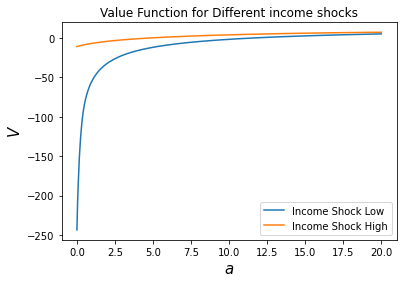

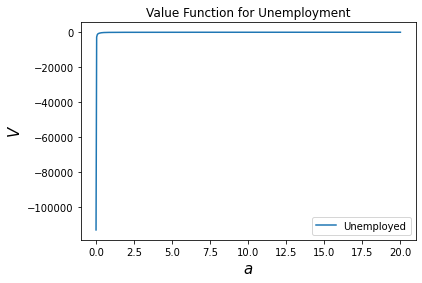

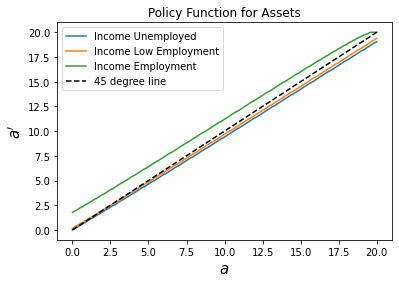

In [98]:
ValueUnemployed = ValueFunction1_CRRA_2[0][0:n]
ValueLowEmployed = ValueFunction1_CRRA_2[0][n:2*n]
ValueEmployed = ValueFunction1_CRRA_2[0][2*n:]



PolicyUnemployed= Policy_CRRA_2[0][:n]
PolicyLowEmployed= Policy_CRRA_2[0][n:2*n]
PolicyEmployed = Policy_CRRA_2[0][2*n:]
# Plot Value Function:

fig, ax = plt.subplots()
ax.plot(grid,ValueLowEmployed.T,label='Income Shock Low')
ax.plot(grid,ValueEmployed.T,label='Income Shock High')
plt.ylabel("$V$",fontsize=15)
plt.xlabel("$a$",fontsize=15)
plt.title("Value Function for Different income shocks")
plt.legend()

fig, ax = plt.subplots()
ax.plot(grid,ValueUnemployed.T,label='Unemployed')
plt.ylabel("$V$",fontsize=15)
plt.xlabel("$a$",fontsize=15)
plt.title("Value Function for Unemployment")
plt.legend()


punemp = np.zeros(n)
for i in range(n):
    j = np.int(PolicyUnemployed[i])
    punemp[i] = grid[j]

plowemp = np.zeros(n)
for i in range(n):
    j = np.int(PolicyLowEmployed[i])
    plowemp[i] = grid[j]
    
pemp = np.zeros(n)
for i in range(n):
    j = np.int(PolicyEmployed[i])
    pemp[i] = grid[j]


    
fig, ax = plt.subplots()
ax.plot(grid,punemp,label='Income Unemployed')
ax.plot(grid,plowemp,label='Income Low Employment')
ax.plot(grid,pemp,label='Income Employment')
ax.plot(grid,grid,'k--',label='45 degree line')
plt.ylabel("$a'$",fontsize=15)
plt.xlabel("$a$",fontsize=15)
plt.title("Policy Function for Assets")
plt.legend()
        


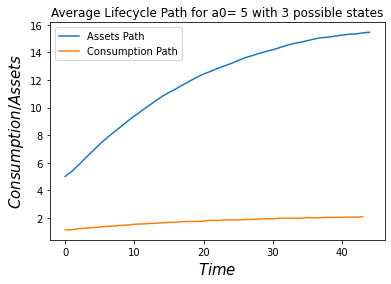

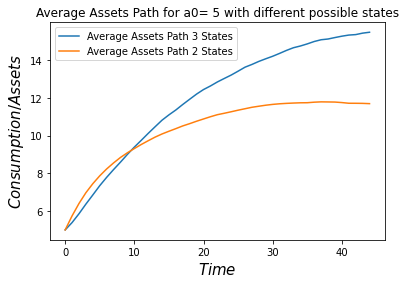

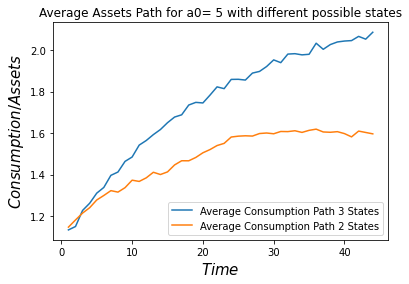

In [119]:
# Random Income Lifecycle path:
def assets_path_random3(grid,policy,initial_assets,T,Y,PI):
    
    ''' This function returns the optimal path for consumption an assets
    for an asset with concrete initial assets that faces an income shock in
    each of his lifecycle periods'''
    
    
    PolicyUnemployed= policy[0][:n]
    PolicyLowEmployed= policy[0][n:2*n]
    PolicyEmployed = policy[0][2*n:]
    
    g = find_nearest(grid,initial_assets)
    
    c = np.where(grid == g)
    
    aspath = np.zeros(T)
    
    conspath = np.zeros(T-1)
    
    a = np.random.multinomial(1,[4/10,4/10,2/10])
    
    z1 = np.where(a==1)
    
    z = z1[0]
        
    for i in range(T):
        
        if i ==0:
            
            aspath[i] = g
            
            c = np.where(grid == g)
            
        if i>0:
        
            if z==0: 
        
                aspath[i] = grid[np.int(PolicyUnemployed[c])]
            
                conspath[i-1] = Y1[0]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.multinomial(1,PI[0])
                
                c = np.where(grid == aspath[i])
                
                z1 = np.where(a==1)
                
                z = z1[0]
                
            if z==1:
                
                aspath[i] = grid[np.int(PolicyLowEmployed[c])]
            
                conspath[i-1] = Y1[1]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.multinomial(1,PI[1])
                
                c = np.where(grid == aspath[i])
                
                z1 = np.where(a==1)
                
                z = z1[0]
            
            if z==2:
                
                aspath[i] = grid[np.int(PolicyEmployed[c])]
            
                conspath[i-1] = Y1[2]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.multinomial(1,PI[2])
                
                c = np.where(grid == aspath[i])
                
                z1 = np.where(a==1)
                
                z = z1[0]
    
    
    return aspath, conspath

rand_ass,rand_cons =  assets_path_random3(grid ,Policy_CRRA_2,initial_assets,45,Y1,PI1)

rand_ass1 = np.zeros(shape=(1000,45))
rand_cons1 = np.zeros(shape=(1000,44))
for i in range(1000):
    rand_ass_1, rand_cons_1 =  assets_path_random3(grid ,Policy_CRRA_2,initial_assets,45,Y1,PI1)
    rand_ass1[i][:] = rand_ass_1
    rand_cons1[i][:] = rand_cons_1
    
av_ass3 = np.mean(rand_ass1,axis=0)
av_cons3 = np.mean(rand_cons1,axis=0)

fig, ax = plt.subplots()
ax.plot(range(45),av_ass3,label='Assets Path')
ax.plot(range(44),av_cons3,label='Consumption Path')
plt.ylabel("$Consumption/Assets$",fontsize=15)
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Lifecycle Path for a0= "+str(initial_assets) + " with 3 possible states")
plt.legend() 

fig, ax = plt.subplots()
ax.plot(range(45),av_ass3,label='Average Assets Path 3 States')
ax.plot(range(45),av_ass,label='Average Assets Path 2 States')
plt.ylabel("$Consumption/Assets$",fontsize=15)
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Assets Path for a0= "+str(initial_assets) + " with different possible states")
plt.legend() 

fig, ax = plt.subplots()
ax.plot(range(1,45,1),av_cons3,label='Average Consumption Path 3 States')
ax.plot(range(1,45,1),av_cons,label='Average Consumption Path 2 States')
plt.ylabel("$Consumption/Assets$",fontsize=15)
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Assets Path for a0= "+str(initial_assets) + " with different possible states")
plt.legend() 





In [120]:
# Covid under 3 STATES Economy:

def assets_path_random3_covid(grid,policy,initial_assets,T,Y,PI,shock_period,prob_unemploy,prob_findjob):
    
    ''' This function returns the optimal path for consumption an assets
    for an asset with concrete initial assets that faces an income shock in
    each of his lifecycle periods'''
    
    
    PolicyUnemployed= policy[0][:n]
    PolicyLowEmployed= policy[0][n:2*n]
    PolicyEmployed = policy[0][2*n:]
    
    g = find_nearest(grid,initial_assets)
    
    c = np.where(grid == g)
    
    aspath = np.zeros(T)
    
    conspath = np.zeros(T-1)
    
    a = np.random.multinomial(1,[4/10,4/10,2/10])
    
    z1 = np.where(a==1)
    
    z = z1[0]
        
    for i in range(T):
        
        if i ==0:
            
            aspath[i] = g
            
            c = np.where(grid == g)
            
        if i == shock_period +1:   # Notice "i" denotes tomorrow, therefore if the shock period is at shock_period then i=s_p +1
            
            if z==0: 
        
                aspath[i] = grid[np.int(PolicyUnemployed[c])]
            
                conspath[i-1] = Y1[0]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.multinomial(1, [(1-prob_findjob),0,prob_findjob])
                
                c = np.where(grid == aspath[i])
                
                z1 = np.where(a==1)
    
                z = z1[0]
                
            if z==1:
                
                aspath[i] = grid[np.int(PolicyLowEmployed[c])]
            
                conspath[i-1] = Y1[1]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.multinomial(1,[prob_unemploy,(1-prob_unemploy)/2,(1-prob_unemploy)/2])
                
                c = np.where(grid == aspath[i])
                
                z1 = np.where(a==1)
    
                z = z1[0]
            
            if z==2:
                
                aspath[i] = grid[np.int(PolicyEmployed[c])]
            
                conspath[i-1] = Y1[2]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.multinomial(1,[prob_unemploy,(1-prob_unemploy)/2,(1-prob_unemploy)/2])
                
                c = np.where(grid == aspath[i])
                
                z1 = np.where(a==1)
    
                z = z1[0]
            
        
        else:
        
            if z==0: 
        
                aspath[i] = grid[np.int(PolicyUnemployed[c])]
            
                conspath[i-1] = Y1[0]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.multinomial(1,PI[0])
                
                c = np.where(grid == aspath[i])
                
                z1 = np.where(a==1)
    
                z = z1[0]
                
            if z==1:
                
                aspath[i] = grid[np.int(PolicyLowEmployed[c])]
            
                conspath[i-1] = Y1[1]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.multinomial(1,PI[1])
                
                c = np.where(grid == aspath[i])
                
                z1 = np.where(a==1)
    
                z = z1[0]
            
            if z==2:
                
                aspath[i] = grid[np.int(PolicyEmployed[c])]
            
                conspath[i-1] = Y1[2]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.multinomial(1,PI[2])
                
                c = np.where(grid == aspath[i])
                
                z1 = np.where(a==1)
    
                z = z1[0]
    
    return aspath, conspath




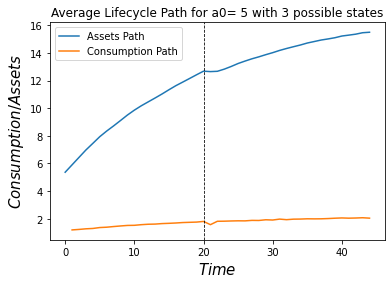

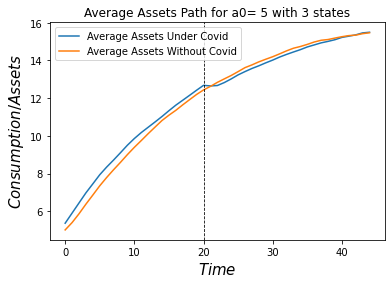

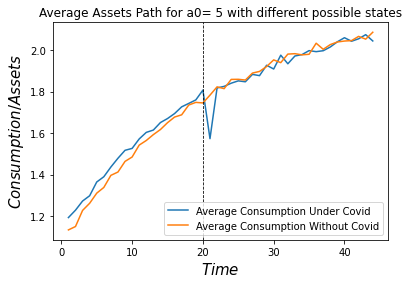

In [127]:

rand_ass1 = np.zeros(shape=(1000,45))
rand_cons1 = np.zeros(shape=(1000,44))
for i in range(1000):
    rand_ass_1, rand_cons_1 =  assets_path_random3_covid(grid ,Policy_CRRA_2,initial_assets,45,Y1,PI1,20,0.1,0)
    rand_ass1[i][:] = rand_ass_1
    rand_cons1[i][:] = rand_cons_1
    
av_ass3_covid = np.mean(rand_ass1,axis=0)
av_cons3_covid = np.mean(rand_cons1,axis=0)

fig, ax = plt.subplots()
ax.plot(range(45),av_ass3_covid,label='Assets Path')
ax.plot(range(1,45,1),av_cons3_covid,label='Consumption Path')
plt.ylabel("$Consumption/Assets$",fontsize=15)
plt.axvline(20 ,ls='--',lw=0.8,color='black')
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Lifecycle Path for a0= "+str(initial_assets) + " with 3 possible states")
plt.legend() 

fig, ax = plt.subplots()
ax.plot(range(45),av_ass3_covid,label='Average Assets Under Covid')
ax.plot(range(45),av_ass3,label='Average Assets Without Covid')
plt.ylabel("$Consumption/Assets$",fontsize=15)
plt.axvline(20 ,ls='--',lw=0.8,color='black')
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Assets Path for a0= "+str(initial_assets) + " with 3 states")
plt.legend() 

fig, ax = plt.subplots()
ax.plot(range(1,45,1),av_cons3_covid,label='Average Consumption Under Covid')
ax.plot(range(1,45,1),av_cons3,label='Average Consumption Without Covid')
plt.ylabel("$Consumption/Assets$",fontsize=15)
plt.axvline(20 ,ls='--',lw=0.8,color='black')
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Assets Path for a0= "+str(initial_assets) + " with different possible states")
plt.legend() 


## Under a lifecycle Economy with T=45.

TOC: Elapsed: 0:01:23.00
Algorithm takes 83.004 seconds to run


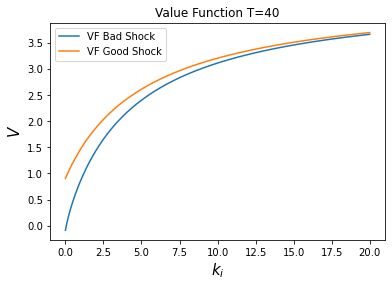

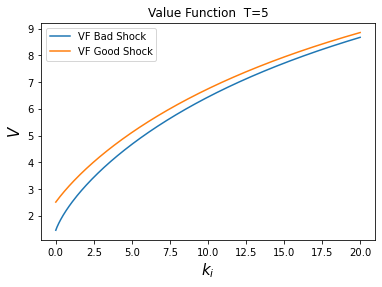

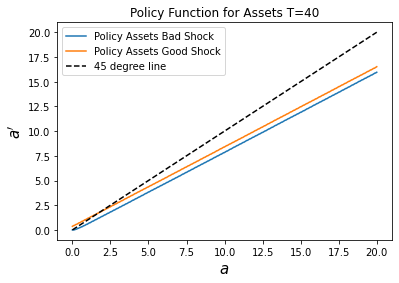

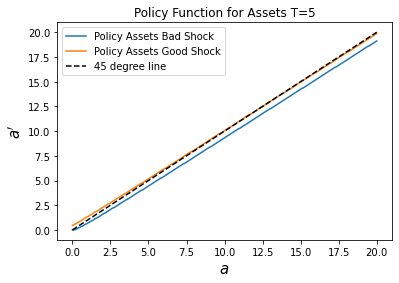

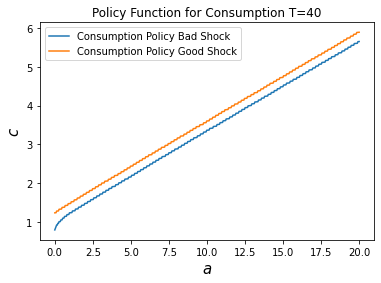

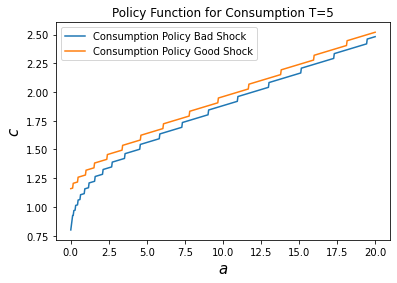

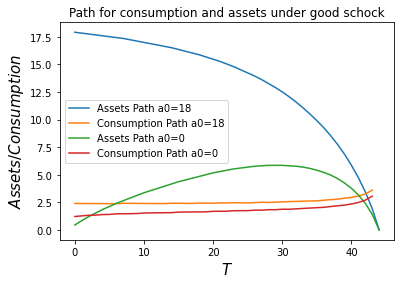

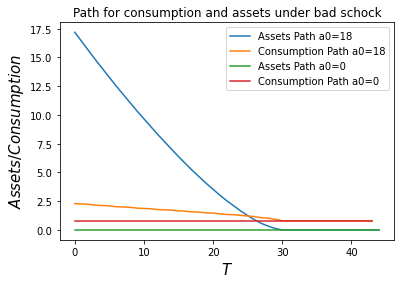

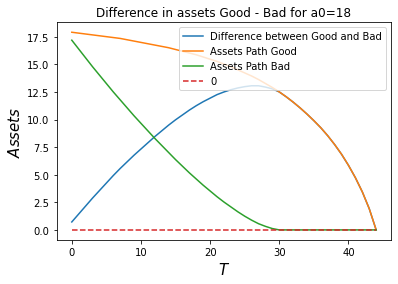

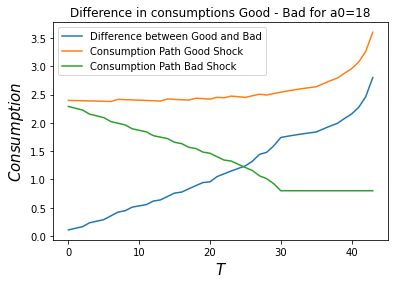

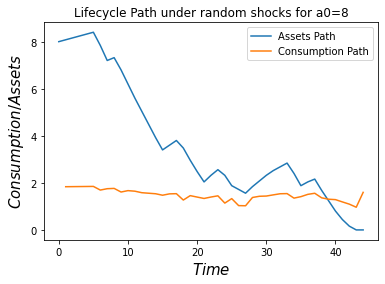

In [134]:
# Define the parameters: 

rho=0.06
r=0.04
sigma=2
c_bar=100
gamma=0.3
sigma_y=0.4
y=1.2
beta=1/(1+rho)
Y1 = [y-sigma_y, y+sigma_y]
PI1 = [[(1+gamma)/2, (1-gamma)/2], [(1-gamma)/2, (1+gamma)/2]]
Amin = 0
n=500
grid=500
epsilon=0.05
Certainty=True
Amax=20
omega = -111111111111111
T=45

grid = np.linspace(Amin+0.001,Amax,n)   # Discrete grid of k

# STEP 2. I make the guess V^{s=0}(k_i)=0.

V = np.zeros(shape=(1,n))    # Initial Guess


# STEP 3 & 4. Generate the return matrix M. Not all values of c are feasible. 

# Generate a function that will evaluate the current utility, that is u(f(k_i)+(1-delta)k_i-k_j): 

def utility (a0,a1,y):
    "This function returs the utility given k_i and k_j with the form u() = ln(k1^{1-θ} + (1-δ)k1-k2)"
    # Inputs:
        #--> Capital today:    k1
        #--> Capital tomorrow: k2
        
    c = y+a0*(1+r)-a1
    if c>=0:    
        u = (((c)**(1-sigma)-1)/(1-sigma))
    else:
        u=omega
    return u

# As suggested by the slides I will change not feasible values by a very negative number omega:



# Define a function that gives the maximum k_j feasible given k_i
def feasible(a0,y):
    "Returns the maximum feasible k_j given k_i with the form : f(k_i)+(1-δ)k_i"
    # Inputs:
        #--> Capital today:    k1
    f = y+(1+r)*a0
    return f

# Generate the matrix M following the lecture notes : 

M = np.zeros(shape=(n*len(Y1),n))     # Empty matrix that later will become the utility evaluated at every possible combination of k_i and k_j

for x in range(len(Y1)):
    for i in range(n):
        for j in range(n):
            M[i+n*x][j] = utility(grid[i],grid[j],Y1[x])  # Gives the element ij of matrix M


# Important !! --> I have to do Step 3 and 4 at the same time since the log of a negative value is not well defined, so I have to prevent this. 


# STEP 5 & 6.


def VFI(M,V,T):
    "This function returns the solution for the Bellman equation using Value Function Iteration algorithim and counts the number of iterations "
    # Inputs:
        # --> M (Initial value)
        # --> V (Initial guess)
        # --> epsilon (tolerance)
        # --> T (number of periods to consider)
    # Output:
        # --> Returns fixed point value function.
    
    qe.tic()                       # Starts to count the time this functions takes to run
    
    X  = np.zeros(shape=(n*len(Y1),n))     # Empty Array that will hold all possible Bellman equations
    
    Vnew = np.zeros(shape=(T,n*len(Y1)))   # Array for new iteriation of V. 
    
    g = np.zeros(shape=(T,n*len(Y1)))      # Array for optimal decision rule
    
    W = np.zeros(shape=(1,n*len(Y1)))
            
    # Get the max of all the possible X[j] = M + betaV given j, assuming the initial guess is V=0:
            

    # Loop to generate X:
    for i in range(n*len(Y1)):
        for j in range(n):
            X[i][j] = M[i][j] + beta*V[0][j]
    
    for t in reversed(range(45)):
        if t == 44: 
            for i in range(n*len(Y1)):
                Vnew[t][i] = np.amax(X[i][:])
                g[t][i] = np.argmax(X[i][:])

        if t<44 : 
            for i in range(n*len(Y1)):
                if i<=n-1:
                    Z = np.array([Vnew[t+1][i] , Vnew[t+1][i+n]])
                        
                    W[0][i] = np.inner(PI1[0] , Z)
                        
                else: 
                    Z = np.array([Vnew[t+1][i-n] , Vnew[t+1][i]])
                        
                    W[0][i] = np.inner(PI1[1] , Z)
                
            for x in range(len(Y1)):
                for i in range(n):
                    for j in range(n):
                        X[i+n*x][j] = M[i+n*x][j] + beta*W[0][j+n*x]
                    
            for i in range(n*len(Y1)):
                Vnew[t][i] = np.amax(X[i][:])
                g[t][i] = np.argmax(X[i][:])
    
    T = qe.toc()     # Stops counting time
    
    print('Algorithm takes '+ str(round(T,3)) + ' seconds to run')
    return Vnew , g
    
ValueFunction1 , Policy = VFI(M,V,T)


ValueFunctionBad = ValueFunction1[:,:n]
ValueFunctionGood = ValueFunction1[:,n:]

PolicyBad= Policy[:,0:n]
PolicyGood = Policy[:,n:]


# Take only the periods required by the exercice, T=5 and T = 40.

ValueFunctionBad40 = ValueFunctionBad[40][:] 
ValueFunctionGood40 = ValueFunctionGood[40][:] 
ValueFunctionBad5 = ValueFunctionBad[5][:] 
ValueFunctionGood5 = ValueFunctionGood[5][:] 

PolicyBad40 = PolicyBad[40][:] 
PolicyGood40 = PolicyGood[40][:] 
PolicyBad5 = PolicyBad[5][:] 
PolicyGood5 = PolicyGood[5][:] 

pbad40 = np.zeros(n)
for i in range(n):
    j = np.int(PolicyBad40[i])
    pbad40[i] = grid[j]
    
pgood40 = np.zeros(n)
for i in range(n):
    j = np.int(PolicyGood40[i])
    pgood40[i] = grid[j]

pbad5 = np.zeros(n)
for i in range(n):
    j = np.int(PolicyBad5[i])
    pbad5[i] = grid[j]

pgood5 = np.zeros(n)
for i in range(n):
    j = np.int(PolicyGood5[i])
    pgood5[i] = grid[j]
    
    

cbad5 = consumption(PolicyBad5,Y1[0])
cgood5 = consumption(PolicyGood5,Y1[1])


cbad40 = consumption(PolicyBad40,Y1[0])
cgood40 = consumption(PolicyGood40,Y1[1])


# Plot Value Function:

fig, ax = plt.subplots()
ax.plot(grid,ValueFunctionBad40.T,label='VF Bad Shock')
ax.plot(grid,ValueFunctionGood40.T,label='VF Good Shock')
plt.ylabel("$V$",fontsize=15)
plt.xlabel("$k_i$",fontsize=15)
plt.title("Value Function T=40")
plt.legend()


fig, ax = plt.subplots()
ax.plot(grid,ValueFunctionBad5.T,label='VF Bad Shock')
ax.plot(grid,ValueFunctionGood5.T,label='VF Good Shock')
plt.ylabel("$V$",fontsize=15)
plt.xlabel("$k_i$",fontsize=15)
plt.title("Value Function  T=5")
plt.legend()


# Plot the policy function: 

fig, ax = plt.subplots()
ax.plot(grid,pbad40,label='Policy Assets Bad Shock')
ax.plot(grid,pgood40,label='Policy Assets Good Shock')
ax.plot(grid,grid,'k--',label='45 degree line')
plt.ylabel("$a'$",fontsize=15)
plt.xlabel("$a$",fontsize=15)
plt.title("Policy Function for Assets T=40")
plt.legend()

fig, ax = plt.subplots()
ax.plot(grid,pbad5,label='Policy Assets Bad Shock')
ax.plot(grid,pgood5,label='Policy Assets Good Shock')
ax.plot(grid,grid,'k--',label='45 degree line')
plt.ylabel("$a'$",fontsize=15)
plt.xlabel("$a$",fontsize=15)
plt.title("Policy Function for Assets T=5")
plt.legend()


# Plot the consumption decisions: 


fig, ax = plt.subplots()
ax.plot(grid,cbad40,label='Consumption Policy Bad Shock')
ax.plot(grid,cgood40,label='Consumption Policy Good Shock')
plt.ylabel("$c$",fontsize=15)
plt.xlabel("$a$",fontsize=15)
plt.title("Policy Function for Consumption T=40")
plt.legend() 

fig, ax = plt.subplots()
ax.plot(grid,cbad5,label='Consumption Policy Bad Shock')
ax.plot(grid,cgood5,label='Consumption Policy Good Shock')
plt.ylabel("$c$",fontsize=15)
plt.xlabel("$a$",fontsize=15)
plt.title("Policy Function for Consumption T=5")
plt.legend() 


# Subrutine for Consumption and Assets Path:
    
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

    
def assets_path(grid,policy,initial_assets,T,y):
    
    g = find_nearest(grid,initial_assets)
    
    c = np.where(grid == g)
    
    aspath = np.zeros(T)
    
    conspath = np.zeros(T-1)
    
    for i in range(T):
        
        aspath[i] = grid[np.int(policy[i][c])]
        
        c = np.where(grid == aspath[i])
        
    for i in range(T-1):
        
        conspath[i] = y+aspath[i]*(1+r)-aspath[i+1]
        
    return aspath,conspath
        
        
assetspath_good18, conspath_good18 = assets_path(grid,PolicyGood,18,45,Y1[1])    
assetspath_good0, conspath_good0 = assets_path(grid,PolicyGood,0,45,Y1[1])       
    
fig, ax = plt.subplots()
ax.plot(range(45),assetspath_good18,label='Assets Path a0=18')
ax.plot(range(44),conspath_good18,label='Consumption Path a0=18')
ax.plot(range(45),assetspath_good0,label='Assets Path a0=0')
ax.plot(range(44),conspath_good0,label='Consumption Path a0=0')
plt.ylabel("$Assets/Consumption$",fontsize=15)
plt.xlabel("$T$",fontsize=15)
plt.title("Path for consumption and assets under good schock")
plt.legend() 

assetspath_bad18, conspath_bad18 = assets_path(grid,PolicyBad,18,45,Y1[0])    
assetspath_bad0, conspath_bad0 = assets_path(grid,PolicyBad,0,45,Y1[0])     
    
fig, ax = plt.subplots()
ax.plot(range(45),assetspath_bad18,label='Assets Path a0=18')
ax.plot(range(44),conspath_bad18,label='Consumption Path a0=18')
ax.plot(range(45),assetspath_bad0,label='Assets Path a0=0')
ax.plot(range(44),conspath_bad0,label='Consumption Path a0=0')
plt.ylabel("$Assets/Consumption$",fontsize=15)
plt.xlabel("$T$",fontsize=15)
plt.title("Path for consumption and assets under bad schock")
plt.legend() 


diffass = assetspath_good18 - assetspath_bad18    
    
fig, ax = plt.subplots()
ax.plot(range(45),diffass,label='Difference between Good and Bad')
ax.plot(range(45),assetspath_good18,label='Assets Path Good')
ax.plot(range(45),assetspath_bad18,label='Assets Path Bad')
ax.plot(range(45),np.zeros(45),'--',label='0')
plt.ylabel("$Assets$",fontsize=15)
plt.xlabel("$T$",fontsize=15)
plt.title("Difference in assets Good - Bad for a0=18")
plt.legend()    
  
# Show only consumption: 

diffcons =  conspath_good18 - conspath_bad18

fig, ax = plt.subplots()
ax.plot(range(44),diffcons,label='Difference between Good and Bad')
ax.plot(range(44),conspath_good18,label='Consumption Path Good Shock')
ax.plot(range(44),conspath_bad18,label='Consumption Path Bad Shock')
plt.ylabel("$Consumption$",fontsize=15)
plt.xlabel("$T$",fontsize=15)
plt.title("Difference in consumptions Good - Bad for a0=18")
plt.legend()

    

def assets_path_random_finite(grid,policy,initial_assets,T,Y,PI):
    
    ''' This function returns the optimal path for consumption an assets
    for an asset with concrete initial assets that faces an income shock in
    each of his lifecycle periods'''
    
    
    PolicyBad= policy[:,0:n]
    PolicyGood = policy[:,n:]
    
    g = find_nearest(grid,initial_assets)
    
    c = np.where(grid == g)
    
    aspath = np.zeros(T)
    
    conspath = np.zeros(T-1)
    
    a = np.random.binomial(1,1/2)
    
    
    for i in range(T):
        
        if i ==0:
            
            aspath[i] = g
            
            c = np.where(grid == g)
            
        if i>0:
        
            if a==1: 
        
                aspath[i] = grid[np.int(PolicyGood[i][c])]
            
                conspath[i-1] = Y1[1]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.binomial(1,PI[1][1])
                
                c = np.where(grid == aspath[i])
                
            if a==0:
                
                aspath[i] = grid[np.int(PolicyBad[i][c])]
            
                conspath[i-1] = Y1[0]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.binomial(1,PI[0][1])
                
                c = np.where(grid == aspath[i])
    
    
    return aspath, conspath


rand_ass, rand_cons =  assets_path_random_finite(grid,Policy,8,45,Y1,PI1)

fig, ax = plt.subplots()
ax.plot(range(45),rand_ass,label='Assets Path')
ax.plot(range(1,45,1),rand_cons,label='Consumption Path')
plt.ylabel("$Consumption/Assets$",fontsize=15)
plt.xlabel("$Time$",fontsize=15)
plt.title("Lifecycle Path under random shocks for a0=8")
plt.legend() 


# Introduce the Covid Shock

In [149]:
def assets_path_random_finite_covid(grid,policy,initial_assets,T,Y,PI,shock_period,phigh_high,phigh_low):
    
    ''' This function returns the optimal path for consumption an assets
    for an asset with concrete initial assets that faces an income shock in
    each of his lifecycle periods'''
    
    
    PolicyBad= policy[:,0:n]
    PolicyGood = policy[:,n:]
    
    g = find_nearest(grid,initial_assets)
    
    c = np.where(grid == g)
    
    aspath = np.zeros(T)
    
    conspath = np.zeros(T-1)
    
    a = np.random.binomial(1,1/2)
    
    
    for i in range(T):
        
        if i ==0:
            
            aspath[i] = g
            
            c = np.where(grid == g)
            
        if i == shock_period+1:
            
            if a==1: 
        
                aspath[i] = grid[np.int(PolicyGood[i][c])]
            
                conspath[i-1] = Y1[1]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.binomial(1,phigh_high)
                
                c = np.where(grid == aspath[i])
                
            if a==0:
                
                aspath[i] = grid[np.int(PolicyBad[i][c])]
            
                conspath[i-1] = Y1[0]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.binomial(1,phigh_low)
                
                c = np.where(grid == aspath[i])
            
        
        else:
        
            if a==1: 
        
                aspath[i] = grid[np.int(PolicyGood[i][c])]
            
                conspath[i-1] = Y1[1]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.binomial(1,PI[1][1])
                
                c = np.where(grid == aspath[i])
                
            if a==0:
                
                aspath[i] = grid[np.int(PolicyBad[i][c])]
            
                conspath[i-1] = Y1[0]+aspath[i-1]*(1+r)-aspath[i]
                
                a = np.random.binomial(1,PI[0][1])
                
                c = np.where(grid == aspath[i])
    
    
    return aspath, conspath

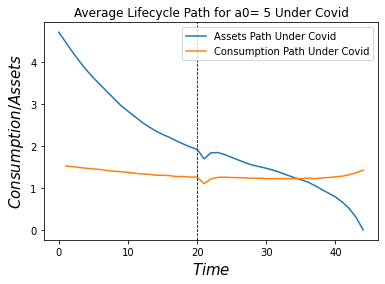

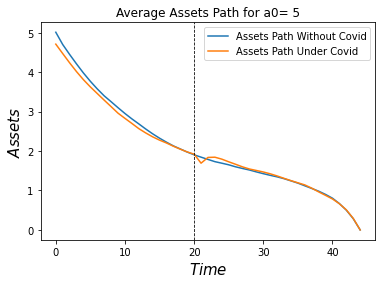

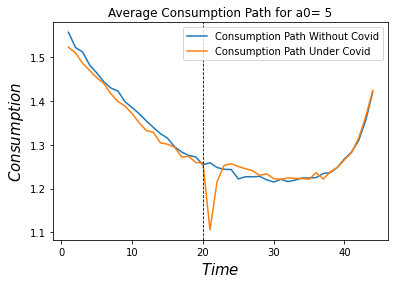

In [152]:
initial_assets = 5

rand_ass1 = np.zeros(shape=(1000,45))
rand_cons1 = np.zeros(shape=(1000,44))
for i in range(1000):
    rand_ass_1, rand_cons_1 =  assets_path_random_finite(grid,Policy,initial_assets,45,Y1,PI1)
    rand_ass1[i][:] = rand_ass_1
    rand_cons1[i][:] = rand_cons_1
    
av_ass_finite = np.mean(rand_ass1,axis=0)
av_cons_finite = np.mean(rand_cons1,axis=0)

rand_ass1 = np.zeros(shape=(1000,45))
rand_cons1 = np.zeros(shape=(1000,44))
for i in range(1000):
    rand_ass_1, rand_cons_1 =  assets_path_random_finite_covid(grid,Policy,initial_assets,45,Y1,PI1,20,0,1)
    rand_ass1[i][:] = rand_ass_1
    rand_cons1[i][:] = rand_cons_1
    
av_ass_finite_covid = np.mean(rand_ass1,axis=0)
av_cons_finite_covid = np.mean(rand_cons1,axis=0)

fig, ax = plt.subplots()
ax.plot(range(45),av_ass_finite_covid,label='Assets Path Under Covid')
ax.plot(range(1,45,1),av_cons_finite_covid,label='Consumption Path Under Covid')
plt.ylabel("$Consumption/Assets$",fontsize=15)
plt.axvline(20 ,ls='--',lw=0.8,color='black')
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Lifecycle Path for a0= "+str(initial_assets)+" Under Covid")
plt.legend() 


fig, ax = plt.subplots()
ax.plot(range(45),av_ass_finite,label='Assets Path Without Covid')
ax.plot(range(45),av_ass_finite_covid,label='Assets Path Under Covid')
plt.ylabel("$Assets$",fontsize=15)
plt.axvline(20 ,ls='--',lw=0.8,color='black')
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Assets Path for a0= "+str(initial_assets))
plt.legend() 

fig, ax = plt.subplots()
ax.plot(range(1,45,1),av_cons_finite,label='Consumption Path Without Covid')
ax.plot(range(1,45,1),av_cons_finite_covid,label='Consumption Path Under Covid')
plt.ylabel("$Consumption$",fontsize=15)
plt.axvline(20 ,ls='--',lw=0.8,color='black')
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Consumption Path for a0= "+str(initial_assets))
plt.legend() 






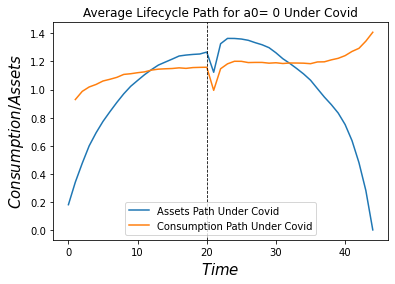

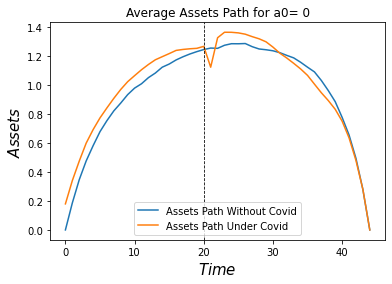

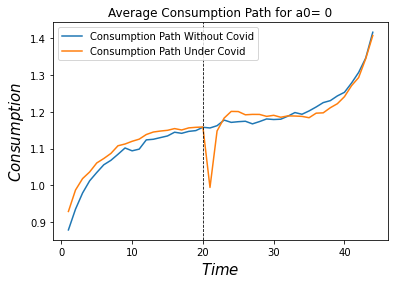

In [151]:
initial_assets = 0

rand_ass1 = np.zeros(shape=(1000,45))
rand_cons1 = np.zeros(shape=(1000,44))
for i in range(1000):
    rand_ass_1, rand_cons_1 =  assets_path_random_finite(grid,Policy,initial_assets,45,Y1,PI1)
    rand_ass1[i][:] = rand_ass_1
    rand_cons1[i][:] = rand_cons_1
    
av_ass_finite = np.mean(rand_ass1,axis=0)
av_cons_finite = np.mean(rand_cons1,axis=0)

rand_ass1 = np.zeros(shape=(1000,45))
rand_cons1 = np.zeros(shape=(1000,44))
for i in range(1000):
    rand_ass_1, rand_cons_1 =  assets_path_random_finite_covid(grid,Policy,initial_assets,45,Y1,PI1,20,0,1)
    rand_ass1[i][:] = rand_ass_1
    rand_cons1[i][:] = rand_cons_1
    
av_ass_finite_covid = np.mean(rand_ass1,axis=0)
av_cons_finite_covid = np.mean(rand_cons1,axis=0)

fig, ax = plt.subplots()
ax.plot(range(45),av_ass_finite_covid,label='Assets Path Under Covid')
ax.plot(range(1,45,1),av_cons_finite_covid,label='Consumption Path Under Covid')
plt.ylabel("$Consumption/Assets$",fontsize=15)
plt.axvline(20 ,ls='--',lw=0.8,color='black')
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Lifecycle Path for a0= "+str(initial_assets)+" Under Covid")
plt.legend() 


fig, ax = plt.subplots()
ax.plot(range(45),av_ass_finite,label='Assets Path Without Covid')
ax.plot(range(45),av_ass_finite_covid,label='Assets Path Under Covid')
plt.ylabel("$Assets$",fontsize=15)
plt.axvline(20 ,ls='--',lw=0.8,color='black')
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Assets Path for a0= "+str(initial_assets))
plt.legend() 

fig, ax = plt.subplots()
ax.plot(range(1,45,1),av_cons_finite,label='Consumption Path Without Covid')
ax.plot(range(1,45,1),av_cons_finite_covid,label='Consumption Path Under Covid')
plt.ylabel("$Consumption$",fontsize=15)
plt.axvline(20 ,ls='--',lw=0.8,color='black')
plt.xlabel("$Time$",fontsize=15)
plt.title("Average Consumption Path for a0= "+str(initial_assets))
plt.legend() 